# Master BigData UCM 2023

## 1. Datos COVID



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Carga de datos

A partir del fichero ya guardado en disco de su lectura y primer pre-proceso

In [2]:
covid = pd.read_pickle("datos_covid.pkl")

In [3]:
covid.shape

(1299030, 8)

In [4]:
covid.describe(include = 'all')

/tmp/ipykernel_90614/1103914288.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  covid.describe(include = 'all')


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
count,1274520,1299030,1299030,1299030,1.299030e+06,1.299030e+06,1.299030e+06,1.299030e+06
unique,52,3,10,817,NaN,NaN,NaN,NaN
top,A,H,0-9,2020-01-01 00:00:00,NaN,NaN,NaN,NaN
freq,24510,433010,129903,1590,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,2020-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2022-03-27 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,8.916877e+00,4.002386e-01,3.815077e-02,7.980339e-02
std,NaN,NaN,NaN,NaN,5.079080e+01,2.523546e+00,3.111570e-01,8.030951e-01
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


# 2. Heatmap con seaborn

Además del contenido recogido en la docu. teórica:

https://seaborn.pydata.org/tutorial.html

es aconsejable seguir este excelente (y práctico) tutorial:

https://pythonbasics.org/seaborn-heatmap/


## 2.1 Barplot por sexo y edad



In [5]:
covid2 = covid.groupby(['provincia_iso', 'grupo_edad']).sum()
covid2 = pd.DataFrame(covid2.to_records())


/tmp/ipykernel_90614/2107986831.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid2 = covid.groupby(['provincia_iso', 'grupo_edad']).sum()


In [6]:
covid2.head()

,provincia_iso,grupo_edad,num_casos,num_hosp,num_uci,num_def
0,A,0-9,45056,280,6,0
1,A,10-19,65367,240,6,1
2,A,20-29,65316,531,11,3
3,A,30-39,72331,992,52,10
4,A,40-49,86892,1788,171,58


In [7]:
covid2_hosp = covid2[['provincia_iso',
                      'grupo_edad',
                      'num_hosp']]

In [8]:
covid2_hosp.head()

,provincia_iso,grupo_edad,num_hosp
0,A,0-9,280
1,A,10-19,240
2,A,20-29,531
3,A,30-39,992
4,A,40-49,1788


/tmp/ipykernel_90614/1387156676.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  covid2_hosp = covid2_hosp.pivot("provincia_iso", "grupo_edad", "num_hosp")


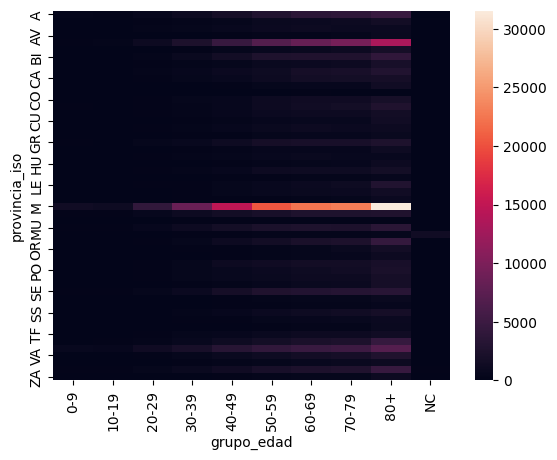

In [9]:
covid2_hosp = covid2_hosp.pivot("provincia_iso", "grupo_edad", "num_hosp")
ax = sns.heatmap(covid2_hosp)


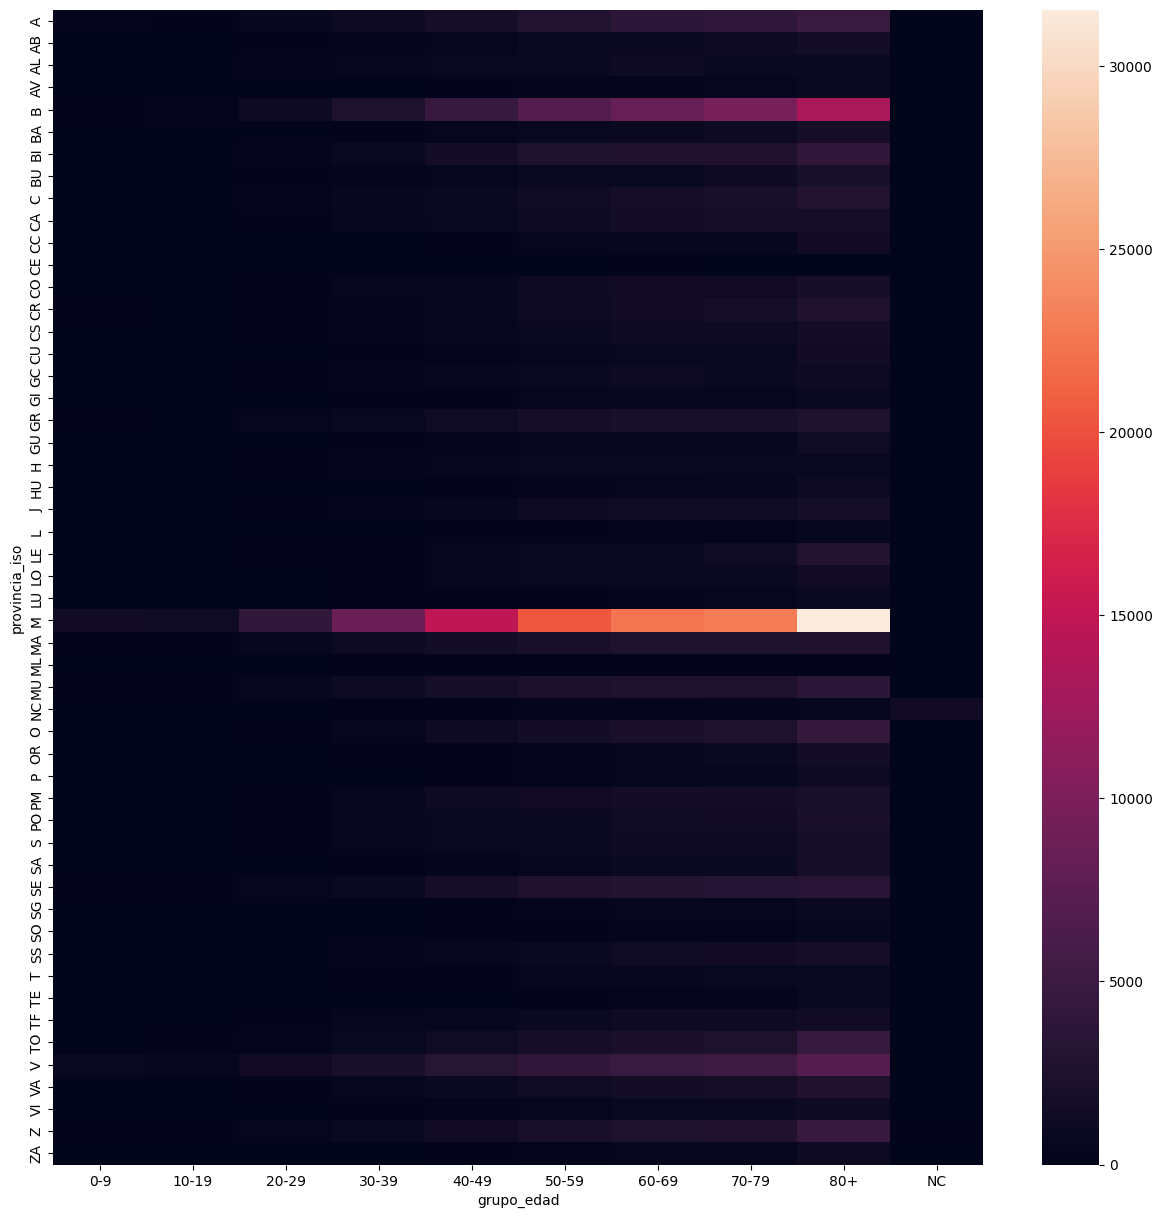

In [10]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
ax = sns.heatmap(covid2_hosp)

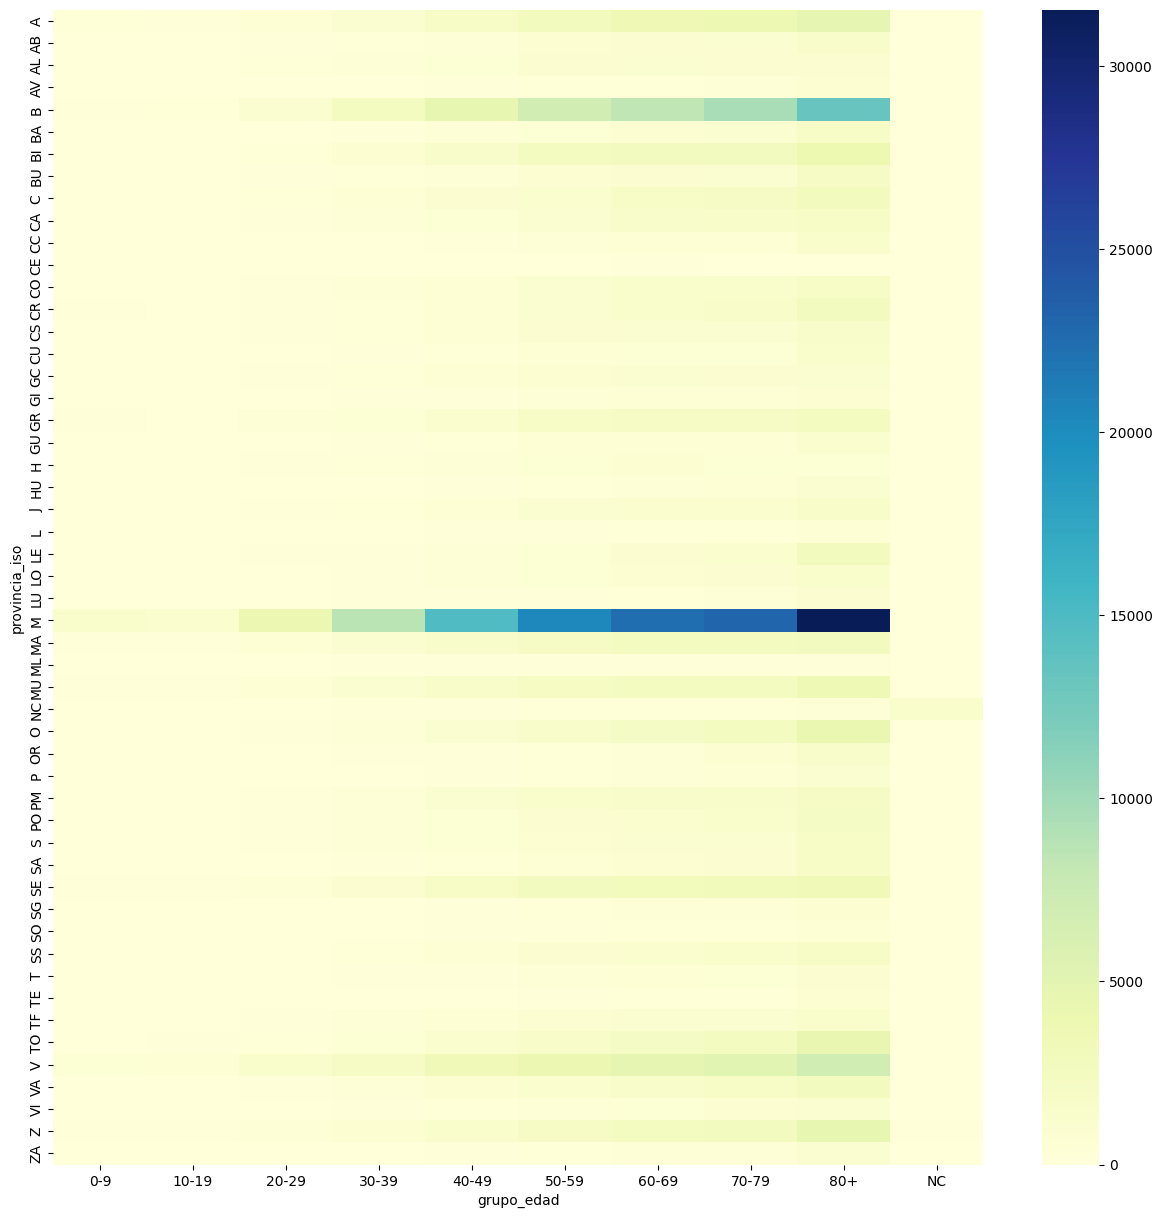

In [11]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
diverging_colors = sns.color_palette("RdBu", 10)
ax = sns.heatmap(covid2_hosp,
                 cmap="YlGnBu")

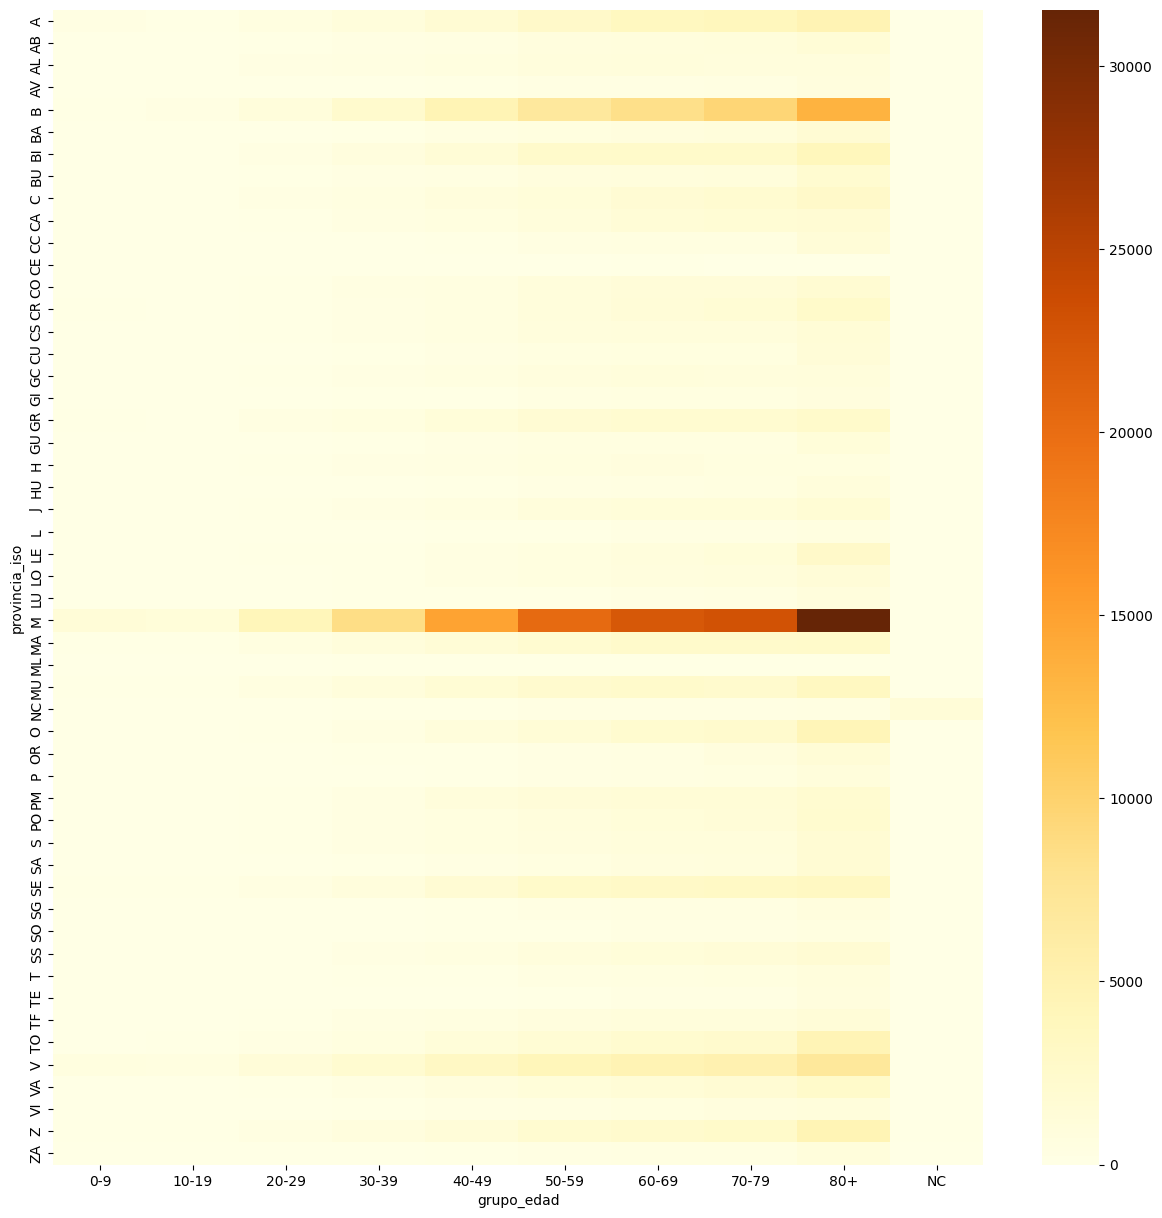

In [12]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
mypalette = sns.color_palette("YlOrBr", as_cmap=True)
ax = sns.heatmap(covid2_hosp,
                 cmap = mypalette)

In [13]:
covid2_def = covid2[['provincia_iso',
                      'grupo_edad',
                      'num_def']]

/tmp/ipykernel_90614/602531683.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  covid2_def = covid2_def.pivot("provincia_iso", "grupo_edad", "num_def")


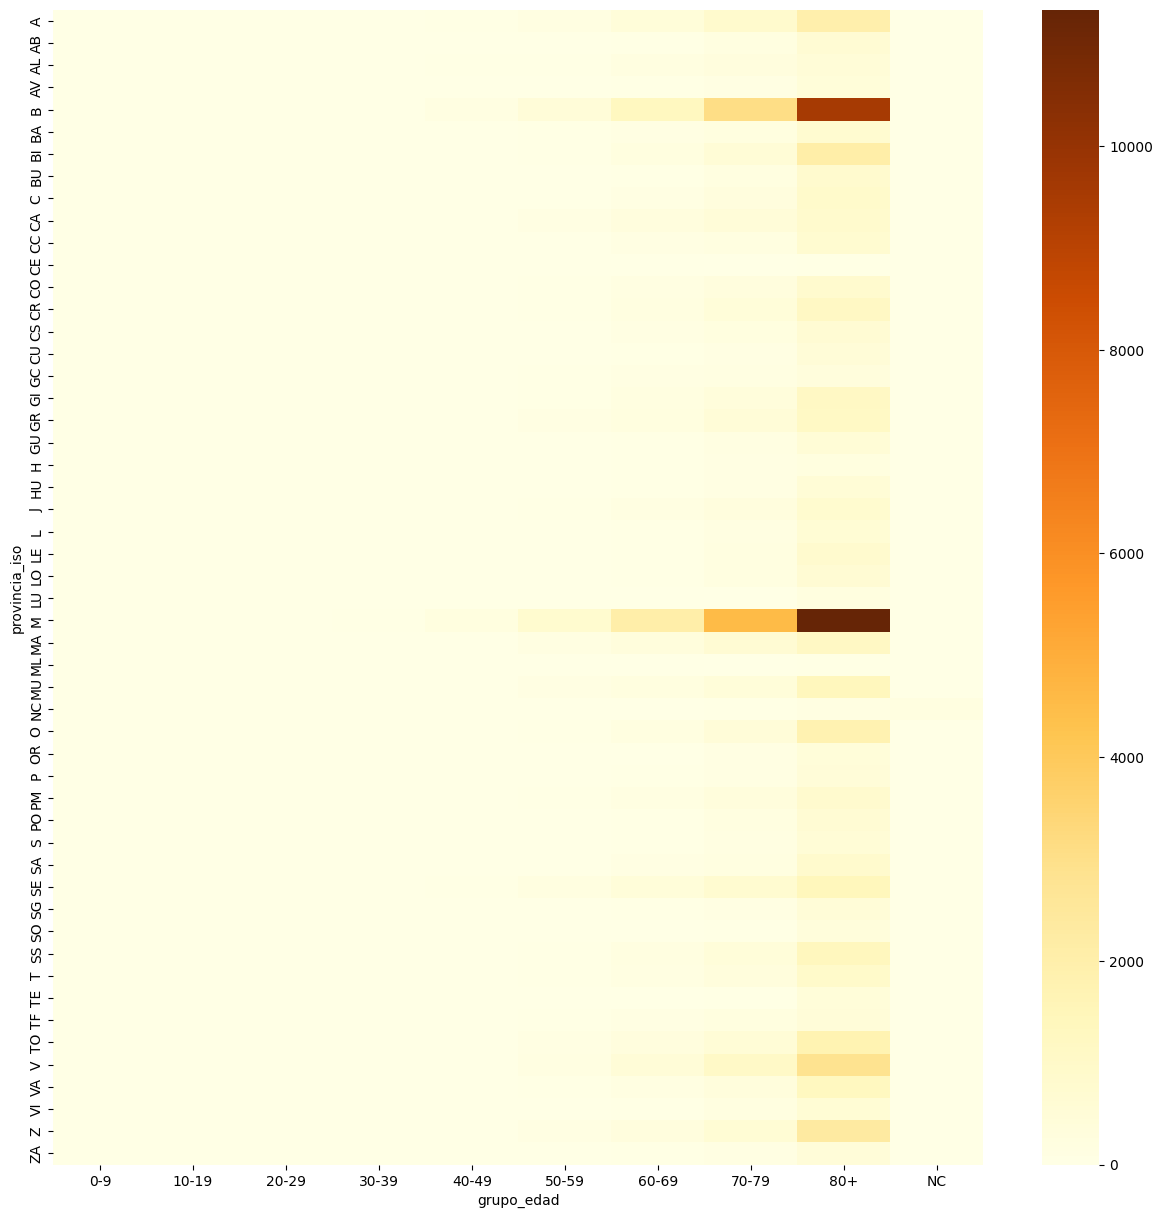

In [14]:
fig, ax = plt.subplots(figsize=(15,15))         # Sample figsize in inches
covid2_def = covid2_def.pivot("provincia_iso", "grupo_edad", "num_def")
ax = sns.heatmap(covid2_def,
                cmap = mypalette)
